CIFAR-10 is a data set that consists of several images divided into the following 10 classes
airplanes
cars
birds
cats
deer
dogs
frogs
horses
ships
trucks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

[1]


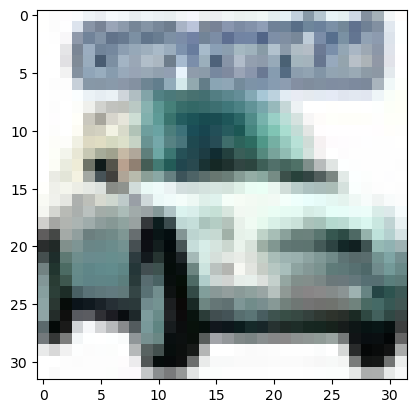

In [7]:
i = 40000
plt.imshow(X_train[i])
print(y_train[i])

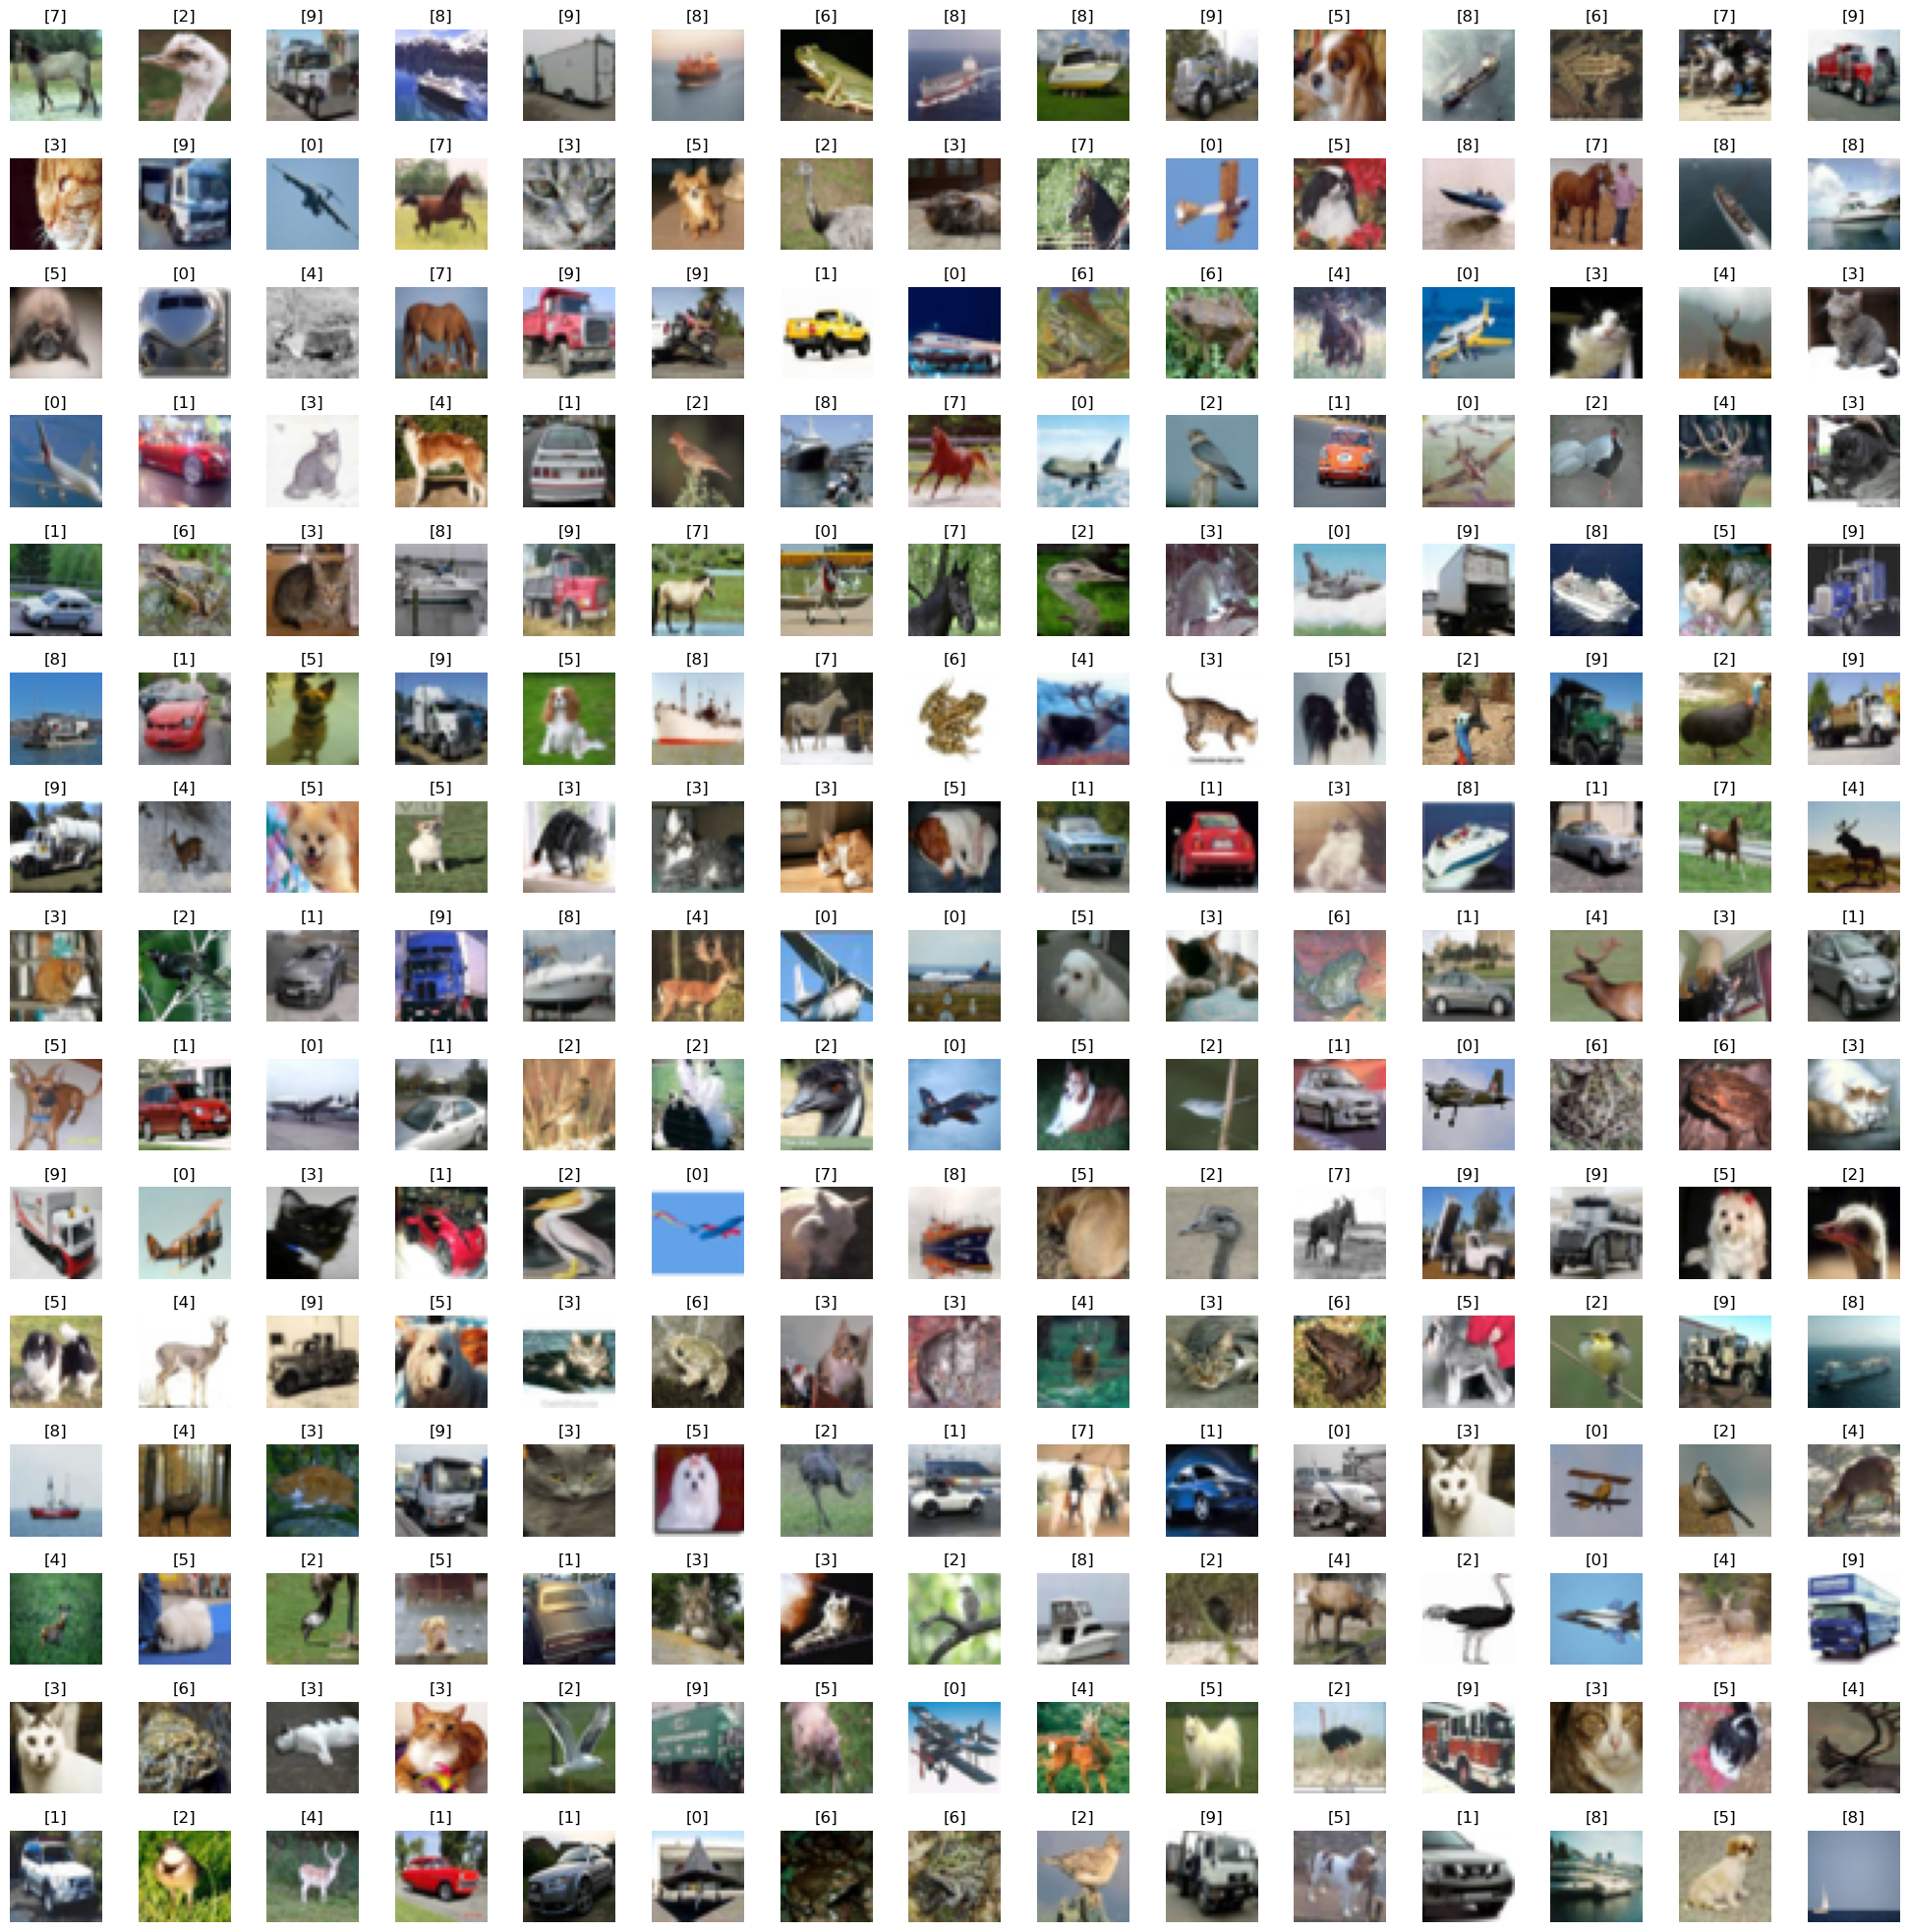

In [8]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) #pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)


In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
number_cat = 10

In [11]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [12]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [15]:
X_train.shape

(50000, 32, 32, 3)

In [16]:
Input_shape = X_train.shape[1:]

In [17]:
Input_shape

(32, 32, 3)

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [24]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32 , kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32 , kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv2D(filters = 64 , kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64 , kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [25]:
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)


In [26]:
cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True) 
# Go through my training data twice, learning from 32 examples at a time, and shuffle the data each time.

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 59ms/step - accuracy: 0.4292 - loss: 1.5664 
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 55ms/step - accuracy: 0.6007 - loss: 1.1359 


In [27]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('test accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6213 - loss: 1.0632
test accuracy: 0.6212999820709229


In [32]:
predictions = cnn_model.predict(X_test)  
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


array([3, 8, 8, ..., 5, 0, 7])

In [33]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [34]:
y_test = y_test.argmax(1)

In [35]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

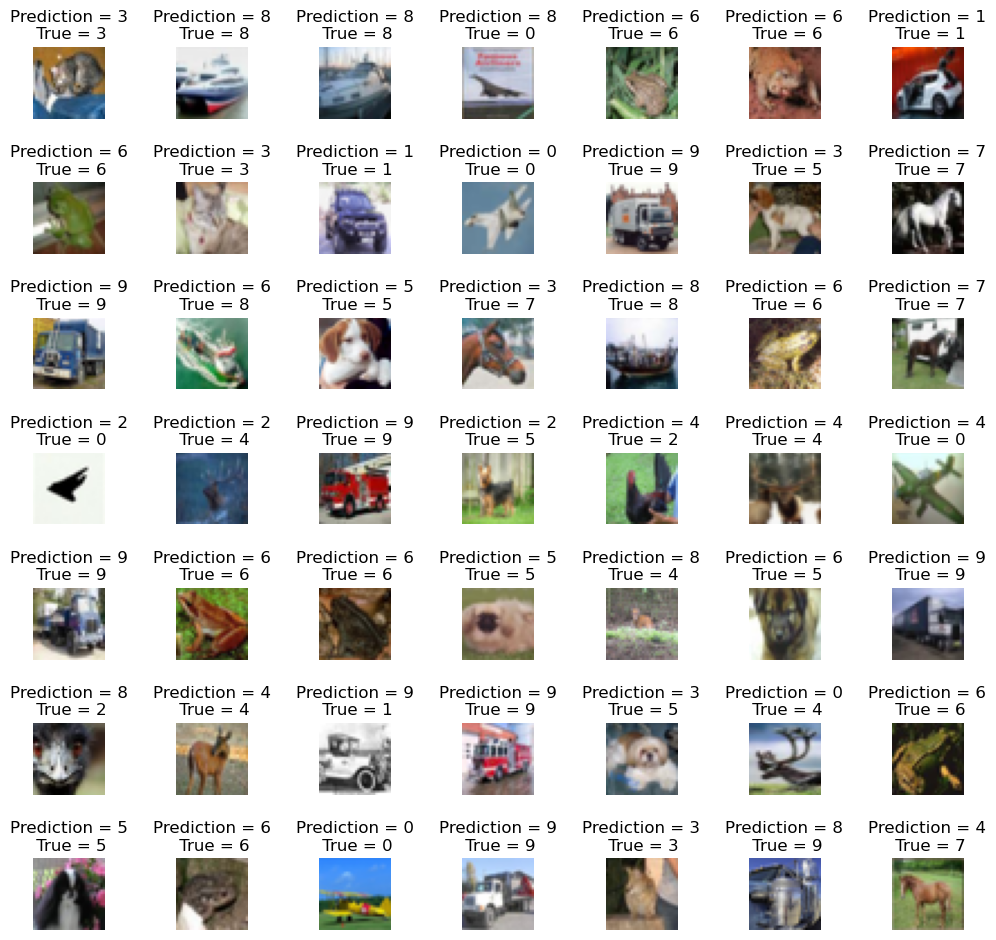

In [38]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)   

<Axes: >

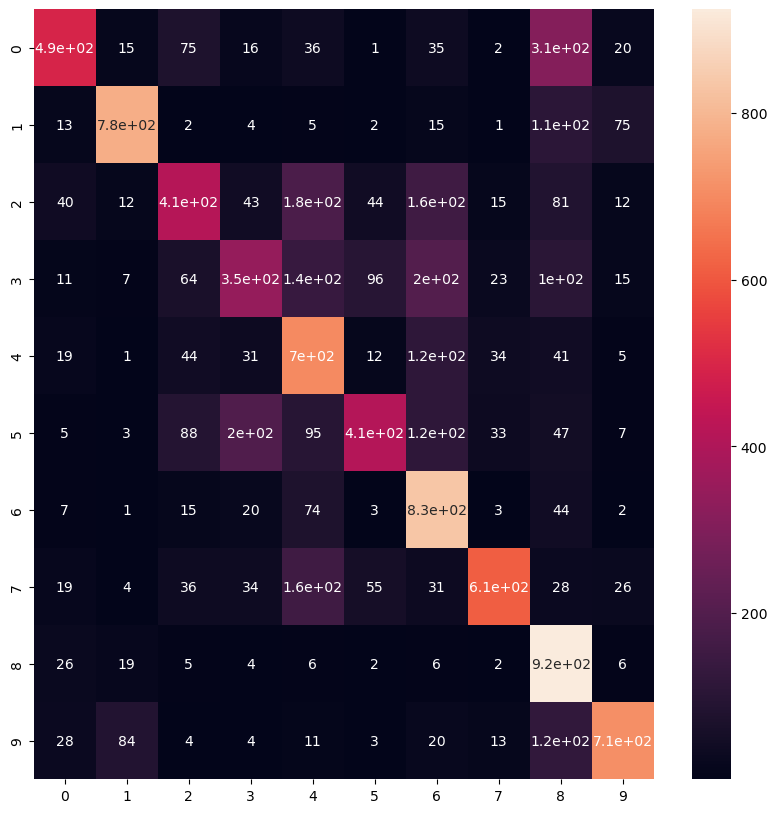

In [40]:
from sklearn.metrics  import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [48]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)